# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data=pd.read_csv("Global Economy Indicators.csv")

In [3]:
data

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [4]:
data.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [5]:
data.drop(' CountryID ',axis=1, inplace=True)

In [10]:
data=data.rename(columns={'AMA exchange rate':'AMA_exchange_rate',
                          "IMF based exchange rate":"IMF_exchange_rate",
                          'Agriculture, hunting, forestry, fishing (ISIC A-B)':'(ISIC A-B)',
                          'Construction (ISIC F)':'(ISIC F)',
                          'Changes in inventories':'Changes_in_inventories',
                           'Exports of goods and services':"Exports",
                           'Final consumption expenditure':'Final_expenditure',
                           'General government final consumption expenditure':"Govt_expenditure",
                          'Gross capital formation':'GCF',
                          'Gross fixed capital formation (including Acquisitions less disposals of valuables)':"GFCF",
                           'Household consumption expenditure (including Non-profit institutions serving households)':"HCE",
                           'Imports of goods and services':"Imports", 'Manufacturing (ISIC D)':" (ISIC D)",
                          'Mining, Manufacturing, Utilities (ISIC C-E)':"(ISIC C-E)",
       'Other Activities (ISIC J-P)':"(ISIC J-P)",
                          'Total Value Added': 'Total_Value_Added',
       'Transport, storage and communication (ISIC I)':" (ISIC I)",
       'Wholesale, retail trade, restaurants and hotels (ISIC G-H)':"(ISIC G-H)",
                          'Gross National Income(GNI) in USD':"GNI",
                          'Gross Domestic Product (GDP)':"GDP"}).copy()

In [11]:
data.head()

,Country,Year,AMA_exchange_rate,IMF_exchange_rate,Population,Currency,Per capita GNI,(ISIC A-B),Changes_in_inventories,(ISIC F),...,HCE,Imports,(ISIC D),(ISIC C-E),(ISIC J-P),Total_Value_Added,(ISIC I),(ISIC G-H),GNI,GDP
0,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,46793902.0,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,48994113.0,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,44535223.0,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,46018542.0,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,55721659.0,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [12]:
data.columns = data.columns.str.strip()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 10512 non-null  object 
 1   Year                    10512 non-null  int64  
 2   AMA_exchange_rate       10512 non-null  float64
 3   IMF_exchange_rate       10512 non-null  float64
 4   Population              10512 non-null  int64  
 5   Currency                10512 non-null  object 
 6   Per capita GNI          10512 non-null  int64  
 7   (ISIC A-B)              10391 non-null  float64
 8   Changes_in_inventories  8671 non-null   float64
 9   (ISIC F)                10512 non-null  float64
 10  Exports                 10491 non-null  float64
 11  Final_expenditure       10512 non-null  float64
 12  Govt_expenditure        10460 non-null  float64
 13  GCF                     10460 non-null  float64
 14  GFCF                    10460 non-null

# Handling missing values

In [14]:
data.isnull().sum()

Country                      0
Year                         0
AMA_exchange_rate            0
IMF_exchange_rate            0
Population                   0
Currency                     0
Per capita GNI               0
(ISIC A-B)                 121
Changes_in_inventories    1841
(ISIC F)                     0
Exports                     21
Final_expenditure            0
Govt_expenditure            52
GCF                         52
GFCF                        52
HCE                         52
Imports                     42
(ISIC D)                    43
(ISIC C-E)                   0
(ISIC J-P)                   0
Total_Value_Added            0
(ISIC I)                    49
(ISIC G-H)                  49
GNI                          0
GDP                          0
dtype: int64

>From the above we saw that 11 columns have null values. The count of null value is highest for "Change im inventories column"

In [15]:
data.columns

Index(['Country', 'Year', 'AMA_exchange_rate', 'IMF_exchange_rate',
       'Population', 'Currency', 'Per capita GNI', '(ISIC A-B)',
       'Changes_in_inventories', '(ISIC F)', 'Exports', 'Final_expenditure',
       'Govt_expenditure', 'GCF', 'GFCF', 'HCE', 'Imports', '(ISIC D)',
       '(ISIC C-E)', '(ISIC J-P)', 'Total_Value_Added', '(ISIC I)',
       '(ISIC G-H)', 'GNI', 'GDP'],
      dtype='object')

In [16]:
data['(ISIC A-B)']=data['(ISIC A-B)'].fillna(data['(ISIC A-B)'].mean())
data['Changes_in_inventories']=data['Changes_in_inventories'].fillna(data['Changes_in_inventories'].mean())
data['Exports']=data['Exports'].fillna(data['Exports'].mean())
data['Govt_expenditure']=data['Govt_expenditure'].fillna(data['Govt_expenditure'].mean())
data['GCF']=data['GCF'].fillna(data['GCF'].mean())
data['GFCF']=data['GFCF'].fillna(data['GFCF'].mean())
data['HCE']=data['HCE'].fillna(data['HCE'].mean())
data[ 'Imports']=data[ 'Imports'].fillna(data[  'Imports'].mean())
data['(ISIC D)']=data['(ISIC D)'].fillna(data[ '(ISIC D)'].mean())
data[ '(ISIC I)']=data['(ISIC I)'].fillna(data[  '(ISIC I)'].mean())
data[  '(ISIC G-H)']=data[   '(ISIC G-H)'].fillna(data[    '(ISIC G-H)'].mean())

In [17]:
data.isnull().sum()

Country                   0
Year                      0
AMA_exchange_rate         0
IMF_exchange_rate         0
Population                0
Currency                  0
Per capita GNI            0
(ISIC A-B)                0
Changes_in_inventories    0
(ISIC F)                  0
Exports                   0
Final_expenditure         0
Govt_expenditure          0
GCF                       0
GFCF                      0
HCE                       0
Imports                   0
(ISIC D)                  0
(ISIC C-E)                0
(ISIC J-P)                0
Total_Value_Added         0
(ISIC I)                  0
(ISIC G-H)                0
GNI                       0
GDP                       0
dtype: int64

> Using mean method filled all the null part and now we don't have any null values.

In [18]:
data.duplicated().sum()

0

>No duplicate values are there.

# EDA

# Descriptive Analysis

In [71]:
data.describe()

,Year,AMA_exchange_rate,IMF_exchange_rate,Population,Per capita GNI,(ISIC A-B),Changes_in_inventories,(ISIC F),Exports,Final_expenditure,...,HCE,Imports,(ISIC D),(ISIC C-E),(ISIC J-P),Total_Value_Added,(ISIC I),(ISIC G-H),GNI,GDP
count,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,...,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04
mean,1996.262747,3.573959e+02,3.419846e+02,2.851523e+07,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,4.671176e+10,1.357713e+11,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,14.900361,2.291128e+03,1.941857e+03,1.141296e+08,17070.205895,4.011060e+10,8.112476e+09,4.985596e+10,1.747109e+11,7.553335e+11,...,6.023499e+11,1.800742e+11,1.720380e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.165919e+10,1.388480e+11,9.942144e+11,9.845997e+11
min,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,-1.669759e+09,2.043926e+06,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,730.000000,1.336557e+08,3.913107e+06,6.815523e+07,4.045403e+08,1.209824e+09,...,9.466590e+08,5.927280e+08,1.124541e+08,1.857038e+08,3.555891e+08,1.355670e+09,9.085524e+07,2.095024e+08,1.410772e+09,1.439217e+09
50%,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,2316.500000,9.569466e+08,1.890237e+08,3.717701e+08,2.417449e+09,6.523676e+09,...,5.258546e+09,2.926233e+09,9.198989e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.516195e+08,1.074474e+09,7.887233e+09,8.070572e+09
75%,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,8965.750000,4.213059e+09,1.626543e+09,2.815730e+09,1.561934e+10,3.783631e+10,...,3.098087e+10,1.658681e+10,7.591012e+09,1.251358e+10,1.442130e+10,4.819144e+10,4.083113e+09,6.905887e+09,5.005789e+10,5.172596e+10
max,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,1.930000e+13,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


# Univariate Analysis

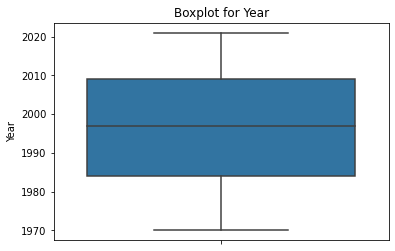

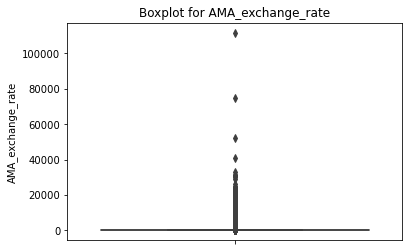

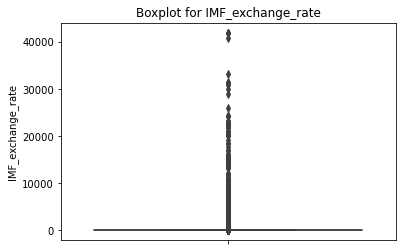

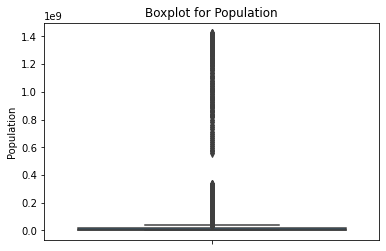

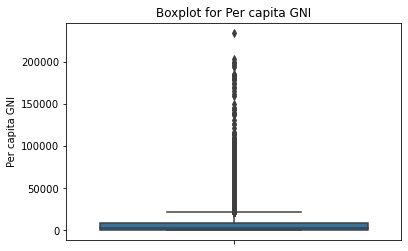

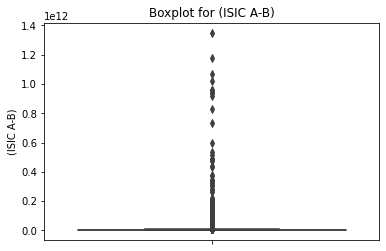

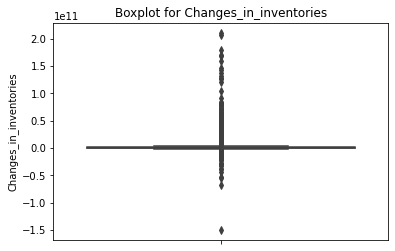

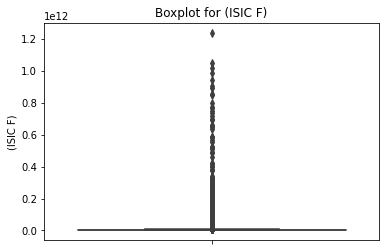

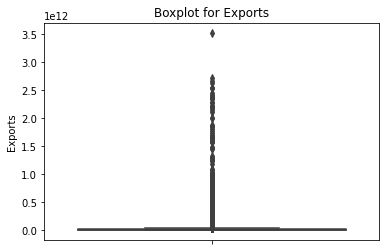

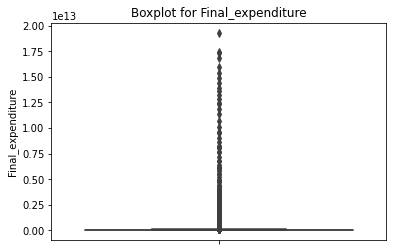

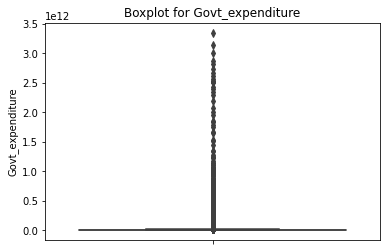

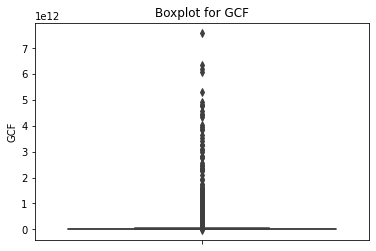

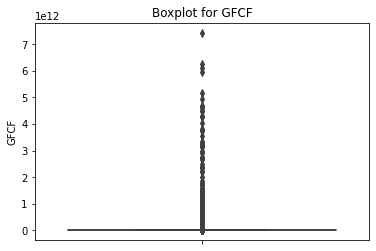

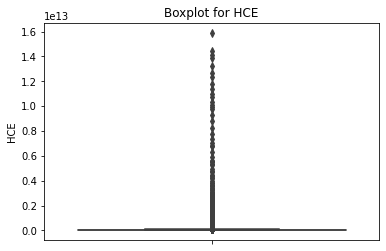

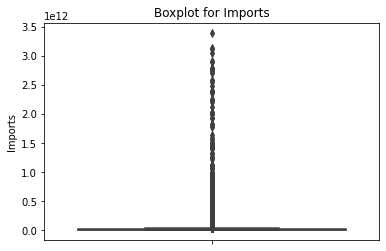

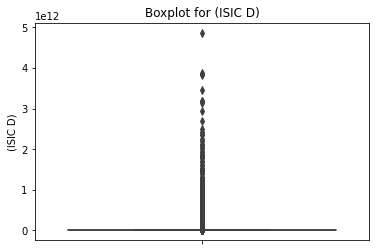

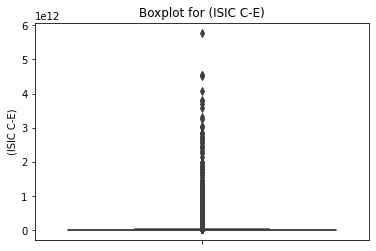

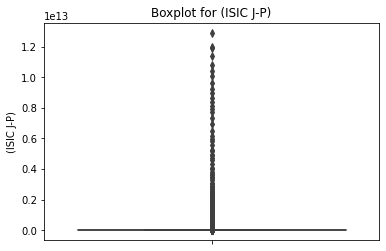

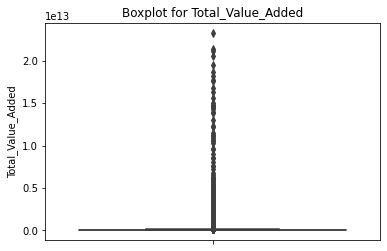

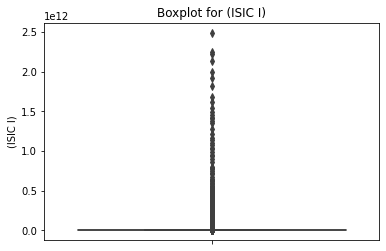

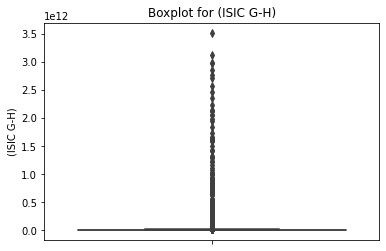

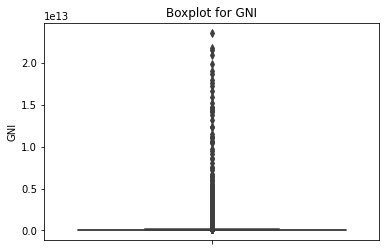

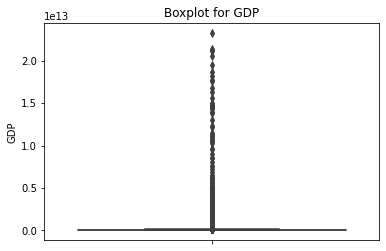

In [72]:
for i in data.columns:
    if data[i].dtype == 'int64' or data[i].dtype == 'float64':
        sns.boxplot(y=data[i], orient='vertical')
        plt.title(f'Boxplot for {i}')
        plt.show()

 > Only "CountryID" and "Year" have perfect boxplot, rest of them have outliers.




>The distribution of these values isn't normal/Gaussian, in which case there's no strong reason to believe that values outside
the IQR are 'outliers'. In particular looks like it could be exponential, or a mixture of two distributions in the second case.
Just use the values as it is.

> In scaling, you’re changing the range of your data while in normalization you’re changing the shape of the distribution of
your data.

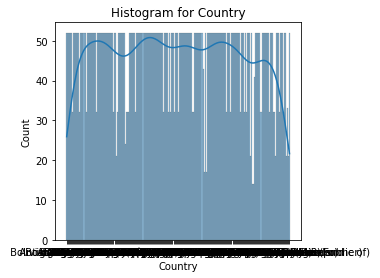

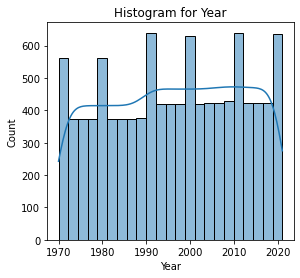

In [73]:
first_three_columns = data.iloc[:, :2]

for column in first_three_columns.columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(first_three_columns[column], kde=True)
    plt.title(f"Histogram for {column}")

plt.show()


# Bivariate Analysis

In [23]:
df_2021 = data[data['Year'] == 2021]
top_15_countries = df_2021.nlargest(15, 'GDP')

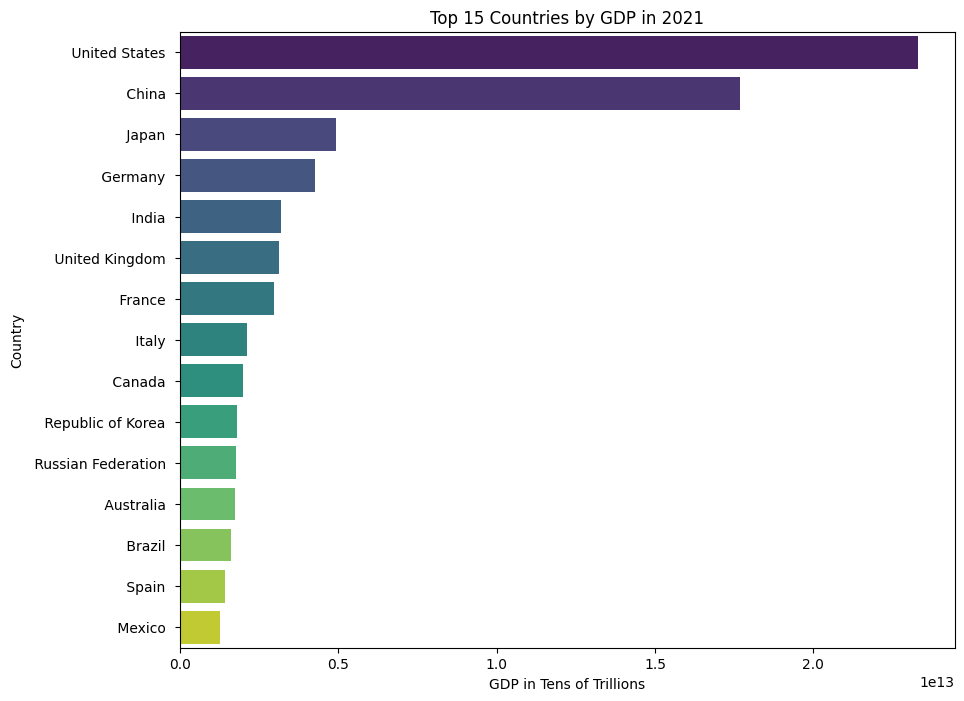

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(x='GDP', y='Country', data=top_15_countries, palette='viridis')
plt.title('Top 15 Countries by GDP in 2021')
plt.xlabel('GDP in Tens of Trillions')
plt.ylabel('Country')

plt.show()


> For a particular year 2021, the GDP of United States is highset followed by China

In [26]:
target_column ='IMF_exchange_rate'
independent_columns = ['GNI','Total_Value_Added','(ISIC G-H)','(ISIC I)','Govt_expenditure','Final_expenditure']

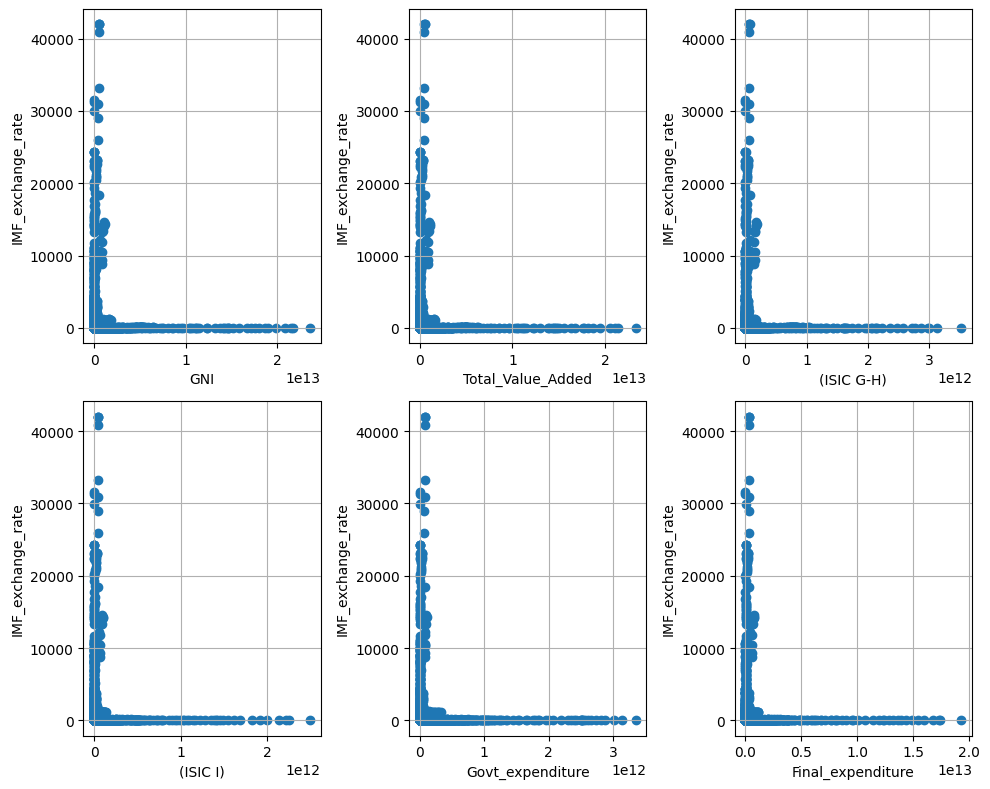

In [27]:
plt.figure(figsize=(10,8))
for i, column in enumerate(independent_columns, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(data[column], data[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.tight_layout()
plt.show()

In [28]:
target_column = 'IMF_exchange_rate'
independent_columns = ['Changes_in_inventories','Population','AMA_exchange_rate',"Year",'Exports', 'Imports']

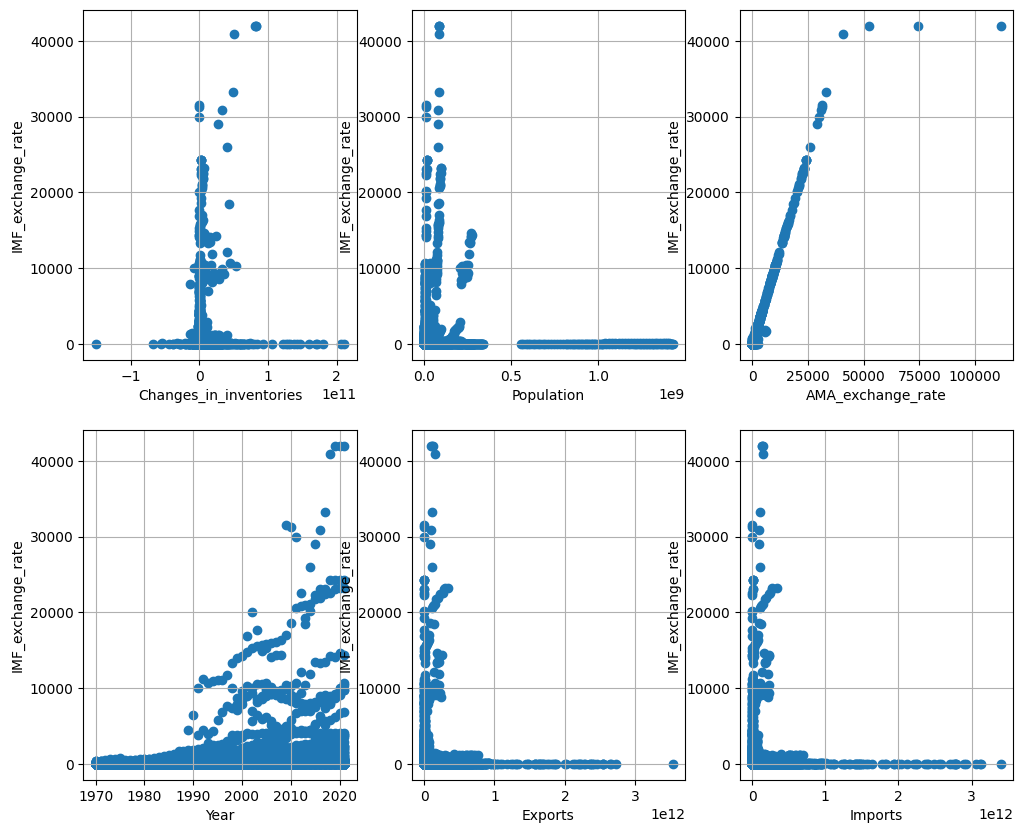

In [29]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(independent_columns, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(data[column], data[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.grid(True)

# Multivariate Anlaysis

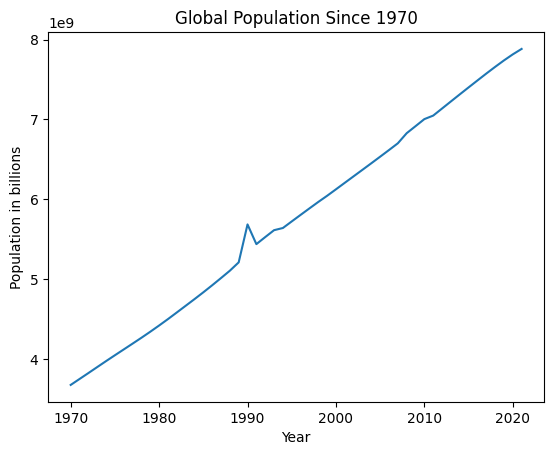

In [30]:
df1 = data[['Country','Year','Population']]
df1.groupby(['Year']).Population.sum().sort_index().plot()
plt.ylabel('Population in billions')
plt.xlabel('Year')
plt.title('Global Population Since 1970');

>From this graph we can see that the population globally reached 8 billion by 2021.

Text(0.5, 1.0, 'Global GDP since 1970')

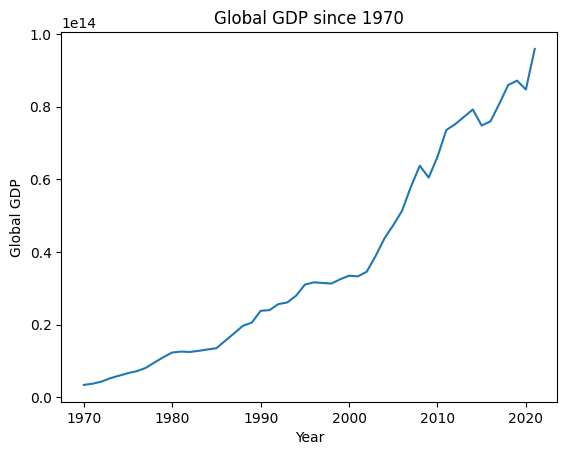

In [31]:
df = data.groupby(['Year']).sum()
df_gdp = df['GDP']
df_gdp.plot();
plt.ylabel('Global GDP')
plt.xlabel('Year')
plt.title('Global GDP since 1970')

In [32]:
data.corr()['IMF_exchange_rate'].sort_values(ascending=False)

IMF_exchange_rate         1.000000
AMA_exchange_rate         0.948164
Year                      0.145939
Changes_in_inventories    0.131074
(ISIC A-B)                0.047207
Population                0.036559
(ISIC C-E)                0.006260
GCF                       0.003999
Imports                   0.003666
Exports                   0.003662
(ISIC F)                  0.002432
GFCF                     -0.000032
(ISIC D)                 -0.000565
Total_Value_Added        -0.003638
GDP                      -0.003951
(ISIC G-H)               -0.004356
(ISIC I)                 -0.004447
GNI                      -0.004487
HCE                      -0.005180
Final_expenditure        -0.006682
(ISIC J-P)               -0.012210
Govt_expenditure         -0.012832
Per capita GNI           -0.067830
Name: IMF_exchange_rate, dtype: float64

# Handling Categorical columns

In [19]:
data.drop(["Currency"],axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Country'] = label_encoder.fit_transform(data['Country'])
#data['Currency'] = label_encoder.fit_transform(data['Currency'])

In [21]:
data

,Country,Year,AMA_exchange_rate,IMF_exchange_rate,Population,Per capita GNI,(ISIC A-B),Changes_in_inventories,(ISIC F),Exports,...,HCE,Imports,(ISIC D),(ISIC C-E),(ISIC J-P),Total_Value_Added,(ISIC I),(ISIC G-H),GNI,GDP
0,0,1970,0.044998,0.044998,10752971,164,8.699174e+08,1.626543e+09,4.679390e+07,1.656187e+08,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,0,1971,0.044998,0.044998,11015857,168,9.108281e+08,1.626543e+09,4.899411e+07,1.935803e+08,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,0,1972,0.044998,0.044998,11286753,149,8.279453e+08,1.626543e+09,4.453522e+07,2.276544e+08,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,0,1973,0.044998,0.044998,11575305,150,8.554869e+08,1.626543e+09,4.601854e+07,2.269136e+08,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,0,1974,0.044998,0.044998,11869879,177,1.035913e+09,1.626543e+09,5.572166e+07,2.849384e+08,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,217,2017,9.519501,9.519501,17298054,1448,1.041005e+09,5.677293e+08,2.455717e+09,9.052008e+09,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,217,2018,10.458143,10.458143,17835893,1451,8.791160e+08,9.290634e+08,2.516889e+09,9.987351e+09,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,217,2019,12.889418,12.889418,18380477,1246,6.668385e+08,8.171044e+08,2.560457e+09,8.073600e+09,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,217,2020,18.344093,18.344093,18927715,928,5.391694e+08,4.392958e+08,2.661361e+09,8.474000e+09,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


# Feature Selection

In [22]:
features=['AMA_exchange_rate','Year','Changes_in_inventories','Country','(ISIC A-B)','Population']
X=data[features]


# Outliers Handling

> For AMA_exchange_rate

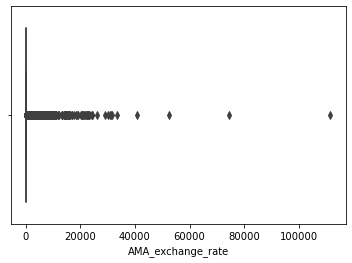

In [23]:
sns.boxplot(data['AMA_exchange_rate'])
plt.show()

In [24]:
quartile = data['AMA_exchange_rate'].quantile(q=[0.25,0.75])
quartile

0.25     1.000000
0.75    51.343163
Name: AMA_exchange_rate, dtype: float64

In [25]:
import numpy as np
quartile.iloc[1]
q1 = quartile.iloc[0]
q3 = quartile.iloc[1]

iqr = q3 - q1
iqr

maxwisker = q3+1.5*(iqr)
print(maxwisker)

minwisker = q1-1.5*(iqr)
print(minwisker)

data['AMA_exchange_rate'] = np.where(data['AMA_exchange_rate']>126.85790676875,126.85790676875,data['AMA_exchange_rate'])

126.85790676875
-74.51474406125


<AxesSubplot:xlabel='AMA_exchange_rate'>

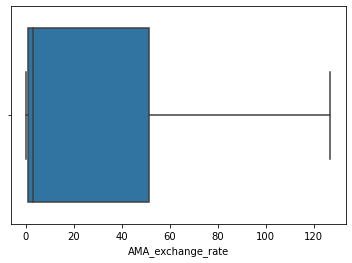

In [26]:
sns.boxplot(data['AMA_exchange_rate'])

>For Changes_in_inventories

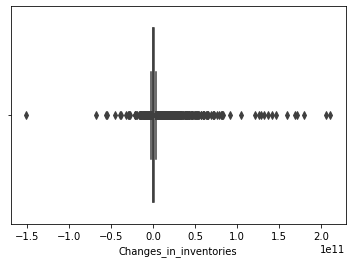

In [27]:
sns.boxplot(data["Changes_in_inventories"])
plt.show()

In [28]:
quartile = data['Changes_in_inventories'].quantile(q=[0.25,0.75])
quartile

0.25    3.913107e+06
0.75    1.626543e+09
Name: Changes_in_inventories, dtype: float64

In [29]:
q1 = quartile.iloc[0]
q3 = quartile.iloc[1]

iqr = q3 - q1
iqr

maxwisker = q3+1.5*(iqr)
print(maxwisker)

minwisker = q1-1.5*(iqr)
print(minwisker)

data['Changes_in_inventories'] = np.where(data['Changes_in_inventories']>4060488346.4984293,4060488346.4984293,data['Changes_in_inventories'])
data['Changes_in_inventories'] = np.where(data['Changes_in_inventories']<-2430032036.2990575,-2430032036.2990575,data['Changes_in_inventories'])

4060488346.4984293
-2430032036.2990575


<AxesSubplot:xlabel='Changes_in_inventories'>

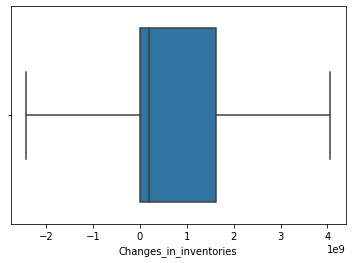

In [30]:
sns.boxplot(data["Changes_in_inventories"])

> For ISIC A-B

<AxesSubplot:xlabel='(ISIC A-B)'>

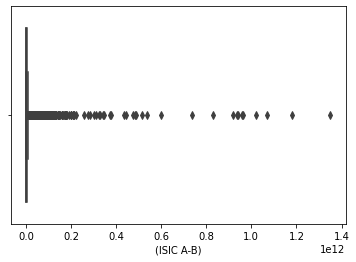

In [31]:
sns.boxplot(data['(ISIC A-B)'])

In [32]:
quartile = data['(ISIC A-B)'].quantile(q=[0.25,0.75])
quartile

0.25    1.336557e+08
0.75    4.213059e+09
Name: (ISIC A-B), dtype: float64

In [33]:
q1 = quartile.iloc[0]
q3 = quartile.iloc[1]

iqr = q3 - q1
iqr

maxwisker = q3+1.5*(iqr)
print(maxwisker)

minwisker = q1-1.5*(iqr)
print(minwisker)



10332163617.5
-5985449126.5


In [34]:
data['(ISIC A-B)'] = np.where(data['(ISIC A-B)']>10332163617.5,10332163617.5,data['(ISIC A-B)'])

<AxesSubplot:xlabel='(ISIC A-B)'>

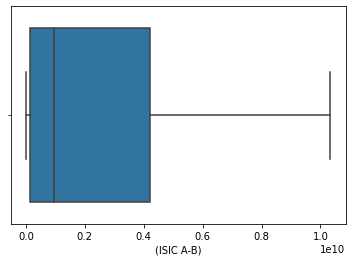

In [35]:
sns.boxplot(data['(ISIC A-B)'])

> For Population

<AxesSubplot:xlabel='Population'>

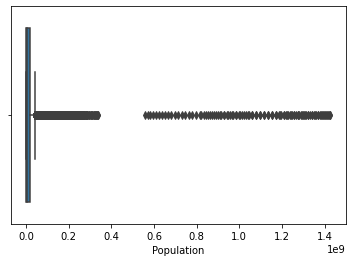

In [36]:
sns.boxplot(data["Population"])

In [37]:
quartile = data['Population'].quantile(q=[0.25,0.75])
quartile

0.25      633061.5
0.75    16788618.5
Name: Population, dtype: float64

In [38]:
q1 = quartile.iloc[0]
q3 = quartile.iloc[1]

iqr = q3 - q1
iqr

maxwisker = q3+1.5*(iqr)
print(maxwisker)

minwisker = q1-1.5*(iqr)
print(minwisker)


41021954.0
-23600274.0


In [39]:
data['Population'] = np.where(data['Population']>41021954.0,41021954.0,data['Population'])

<AxesSubplot:xlabel='Population'>

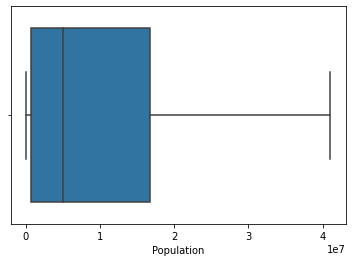

In [40]:
sns.boxplot(data["Population"])

> For IMF_exchange_rate

<AxesSubplot:xlabel='IMF_exchange_rate'>

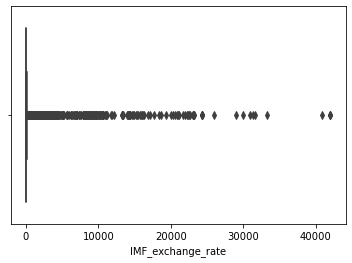

In [41]:
sns.boxplot(data['IMF_exchange_rate'])

In [42]:
quartile = data['IMF_exchange_rate'].quantile(q=[0.25,0.75])
quartile

0.25     1.000000
0.75    48.066844
Name: IMF_exchange_rate, dtype: float64

In [43]:
q1 = quartile.iloc[0]
q3 = quartile.iloc[1]

iqr = q3 - q1
iqr

maxwisker = q3+1.5*(iqr)
print(maxwisker)

minwisker = q1-1.5*(iqr)
print(minwisker)


118.66710936875
-69.60026562125


In [44]:
data['IMF_exchange_rate'] = np.where(data['IMF_exchange_rate']>118.66710936875,118.66710936875,data['IMF_exchange_rate'])

<AxesSubplot:xlabel='IMF_exchange_rate'>

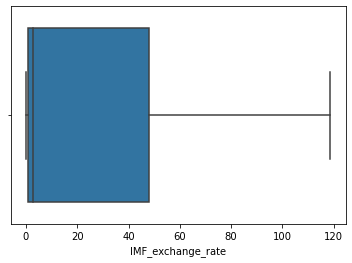

In [45]:
sns.boxplot(data["IMF_exchange_rate"])

# Scaling

In [104]:
from sklearn.preprocessing import RobustScaler

years_countries = X[['Year', 'Country']]
numerical_features = X.drop(columns=['Year', 'Country'])

robust = RobustScaler()
robust.fit(numerical_features)
scaled_features=robust.transform(numerical_features)

df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

df[['Year', 'Country']] = years_countries

In [105]:
df

,AMA_exchange_rate,Changes_in_inventories,(ISIC A-B),Population,Year,Country
0,-0.054981,0.885919,-0.021334,0.352907,1970,0
1,-0.054981,0.885919,-0.011305,0.369180,1971,0
2,-0.054981,0.885919,-0.031623,0.385948,1972,0
3,-0.054981,0.885919,-0.024871,0.403808,1973,0
4,-0.054981,0.885919,0.019357,0.422042,1974,0
...,...,...,...,...,...,...
10507,0.133218,0.233390,0.020606,0.758036,2017,217
10508,0.151863,0.456074,-0.019079,0.791328,2018,217
10509,0.200157,0.387076,-0.071115,0.825036,2019,217
10510,0.308507,0.154239,-0.102411,0.858909,2020,217


# Clustering

In [121]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

Z1 = linkage(df, method='average', metric='cityblock')
clusters = fcluster(Z1, t=2, criterion='maxclust')
silhouette_avg = silhouette_score(df, clusters)
print(f'Silhouette Score for average linkage and cityblock distance metric: {silhouette_avg}')

Silhouette Score for average linkage and cityblock distance metric: 0.9447199329887062


In [122]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(Z1)
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=True, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

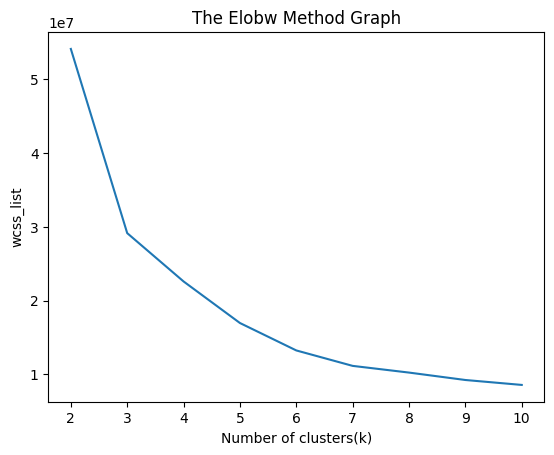

In [126]:
from sklearn.cluster import KMeans
wcss_list= []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

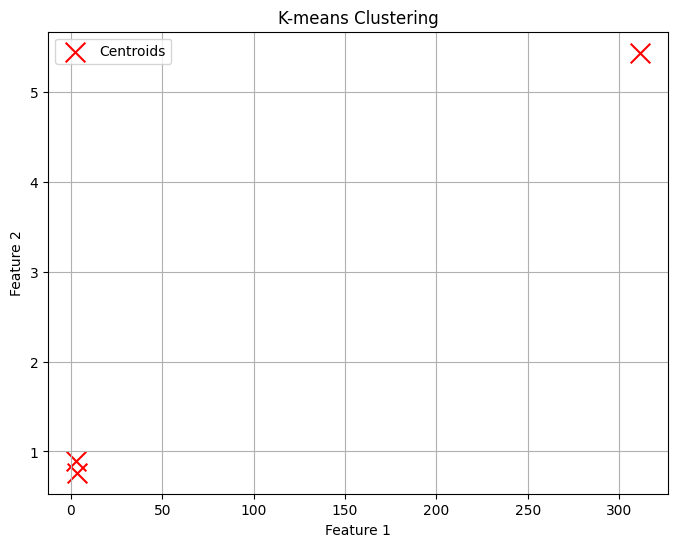

In [127]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Model Building

In [46]:
X
y=data["IMF_exchange_rate"]

In [47]:
X

,AMA_exchange_rate,Year,Changes_in_inventories,Country,(ISIC A-B),Population
0,0.044998,1970,1.626543e+09,0,8.699174e+08,10752971
1,0.044998,1971,1.626543e+09,0,9.108281e+08,11015857
2,0.044998,1972,1.626543e+09,0,8.279453e+08,11286753
3,0.044998,1973,1.626543e+09,0,8.554869e+08,11575305
4,0.044998,1974,1.626543e+09,0,1.035913e+09,11869879
...,...,...,...,...,...,...
10507,9.519501,2017,5.677293e+08,217,1.041005e+09,17298054
10508,10.458143,2018,9.290634e+08,217,8.791160e+08,17835893
10509,12.889418,2019,8.171044e+08,217,6.668385e+08,18380477
10510,18.344093,2020,4.392958e+08,217,5.391694e+08,18927715


In [48]:
df

NameError: name 'df' is not defined

In [49]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
import xgboost as xgb

>Linear Regression

In [51]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model1.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 1911.5023247420183
R-squared Score: 0.10545009712872044


>Ridge Regression

In [54]:
model2=Ridge(alpha=1.0)
model2.fit(X_train,y_train)

TypeError: solve() got an unexpected keyword argument 'sym_pos'

In [114]:
y_pred=model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

AttributeError: 'Ridge' object has no attribute 'coef_'

>SVR

In [55]:
model3=SVR()
model3.fit(X_train,y_train)

SVR()

In [56]:
y_pred=model3.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2866.8977825151187
R-squared Score: -0.3416583907303956


>Random Forest Regressor

In [57]:
model4=RandomForestRegressor(n_estimators=100, random_state=42)
model4.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_pred=model4.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 43.42457074286648
R-squared Score: 0.9796780547753188


>Lasso Regression


In [59]:
model5=Lasso(alpha=1.0)
model5.fit(X_train,y_train)

Lasso()

In [60]:
y_pred=model5.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 1911.5397505853243
R-squared Score: 0.10543258248379384


# Hyperparameter Tuning

In [132]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [134]:
grid_search = GridSearchCV(estimator=model4, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [135]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [136]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:", r2_score)

Mean Squared Error: 36.75979845707393
R2_score: 0.9827970524996451


>Comparison of MSE value

In [137]:
mse_values = {'linear_regression': 1912.4072205848418, 'RIdge': 1912.4002330743629, 'SVR':  2842.6338000438527,'Random_forest':37.57894940284747,'Lasso':1908.9877913683163,"Grid_search":36.75979845707393}


models = list(mse_values.keys())
mse_scores = list(mse_values.values())

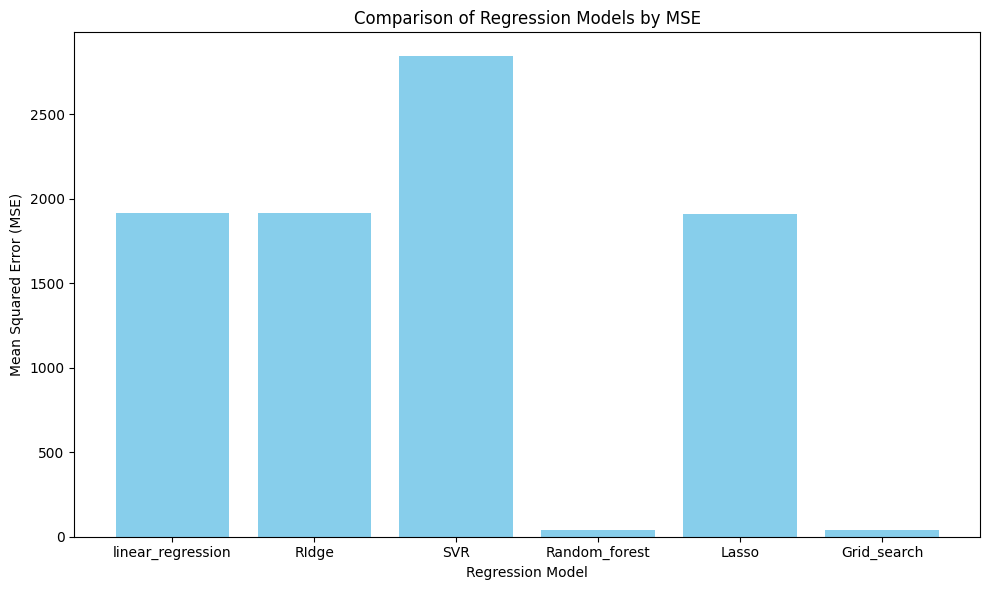

In [138]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color='skyblue')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models by MSE')
plt.tight_layout()
plt.show()

# Prediction

In [123]:
X

,AMA_exchange_rate,Year,Changes_in_inventories,Country,(ISIC A-B),Population
0,0.044998,1970,1.626543e+09,0,8.699174e+08,10752971
1,0.044998,1971,1.626543e+09,0,9.108281e+08,11015857
2,0.044998,1972,1.626543e+09,0,8.279453e+08,11286753
3,0.044998,1973,1.626543e+09,0,8.554869e+08,11575305
4,0.044998,1974,1.626543e+09,0,1.035913e+09,11869879
...,...,...,...,...,...,...
10507,9.519501,2017,5.677293e+08,217,1.041005e+09,17298054
10508,10.458143,2018,9.290634e+08,217,8.791160e+08,17835893
10509,12.889418,2019,8.171044e+08,217,6.668385e+08,18380477
10510,18.344093,2020,4.392958e+08,217,5.391694e+08,18927715


In [61]:
X_input = [[0.044998,	1970,	1.626543e+09,	0,	8.699174e+08,	10752971]]

prediction = model4.predict(X_input)
print(prediction)

[0.04504324]


In [125]:
y

0         0.044998
1         0.044998
2         0.044998
3         0.044998
4         0.044998
           ...    
10507     9.519501
10508    10.458143
10509    12.889418
10510    18.344093
10511    20.018487
Name: IMF_exchange_rate, Length: 10512, dtype: float64

# Web integration part

In [62]:
import pickle

In [63]:
pickle.dump(model4,open("GEI_file.pkl","wb"))